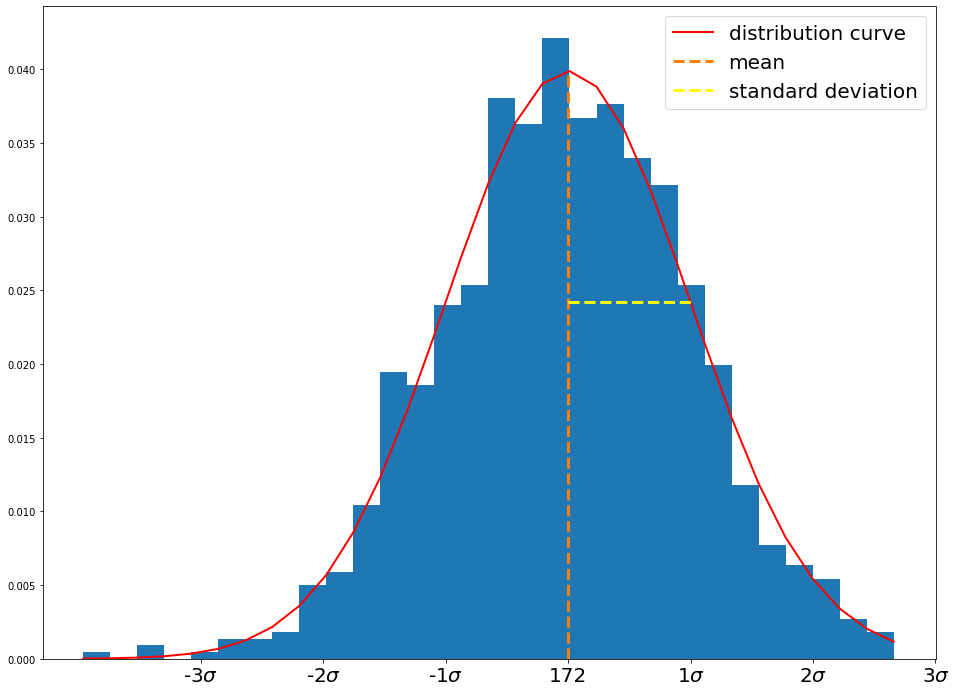

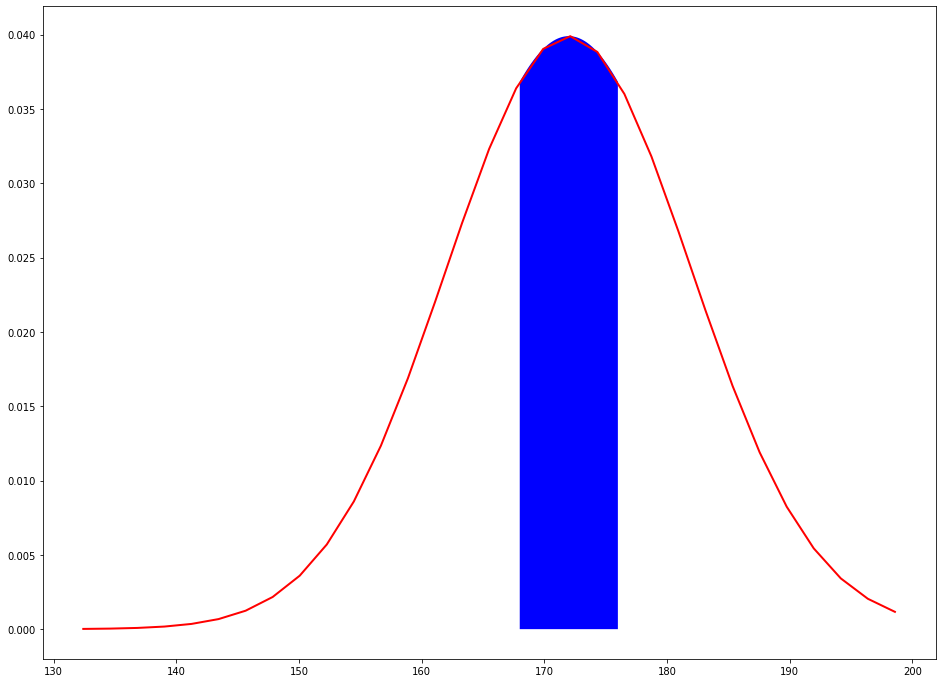

AUC score:  0.31083980051920507


In [7]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.metrics import auc


class Normal:
  def __init__(self, mean, std):
    self.mean = mean
    self.std = std
    self.variance = std**2
    self.bins = None
  
  def pdf(self, x):
    return 1/(self.std * np.sqrt(2 * np.pi))*\
           np.exp(-(x - self.mean)**2 / (2 * self.variance))

  def plot_on_histogram(self, n_samples, plot_mean=False, plot_std=False, std_xticks=False):
    plt_legend = []
    samples = np.random.normal(self.mean, self.std, n_samples)

    figure(figsize=(16,12))
    count, self.bins, ignored = plt.hist(samples, 30, density=True)
    plt.plot(self.bins, self.pdf(self.bins), linewidth=2, color='r')
    plt_legend.append("distribution curve")

    if plot_mean:
      self.plot_mean()
      plt_legend.append("mean")

    if plot_std:
      self.plot_std()
      plt_legend.append("standard deviation")

    if std_xticks:
      plt.xticks([self.mean+n*self.std for n in range(-3, 4)], 
                 [str(n) + r'$\sigma$' if n != 0 else str(self.mean) for n in range(-3, 4)],
                 fontsize=20)

    plt.legend(plt_legend, fontsize=20)
    plt.show()

  def plot_mean(self):
    mean_x, mean_y = self.get_mean_line_coordinates() 
    plt.plot(mean_x, mean_y, "--", linewidth=3)   

  def plot_std(self):
    std_right = self.mean+self.std
    std_x = [self.mean, std_right]
    std_y_value = self.pdf(std_right)
    std_y = [std_y_value, std_y_value]

    plt.plot(std_x, std_y, "--", linewidth=3, color="yellow")

  def calculate_auc_in_range(self, a, b, step=0.0001, plot=False):
    section = np.arange(a, b, step)
    auc_score = auc(section, self.pdf(section))

    if plot:
      assert self.bins is not None
      figure(figsize=(16,12))
      plt.plot(self.bins, self.pdf(self.bins), linewidth=2, color='r')
      plt.fill_between(section, self.pdf(section), facecolor="blue")
      plt.show()
    return auc_score

  def get_mean_line_coordinates(self):
    mean_x = [self.mean, self.mean]
    mean_y = [0, self.pdf(self.mean)]
    return mean_x, mean_y


mean = 172
std = 10
n_samples = 1000
normal_dist = Normal(mean, std)

normal_dist.plot_on_histogram(n_samples, plot_mean=True, plot_std=True, std_xticks=True)

a = 168
b = 176
auc_score = normal_dist.calculate_auc_in_range(a, b, plot=True)

print("AUC score: ", auc_score)
